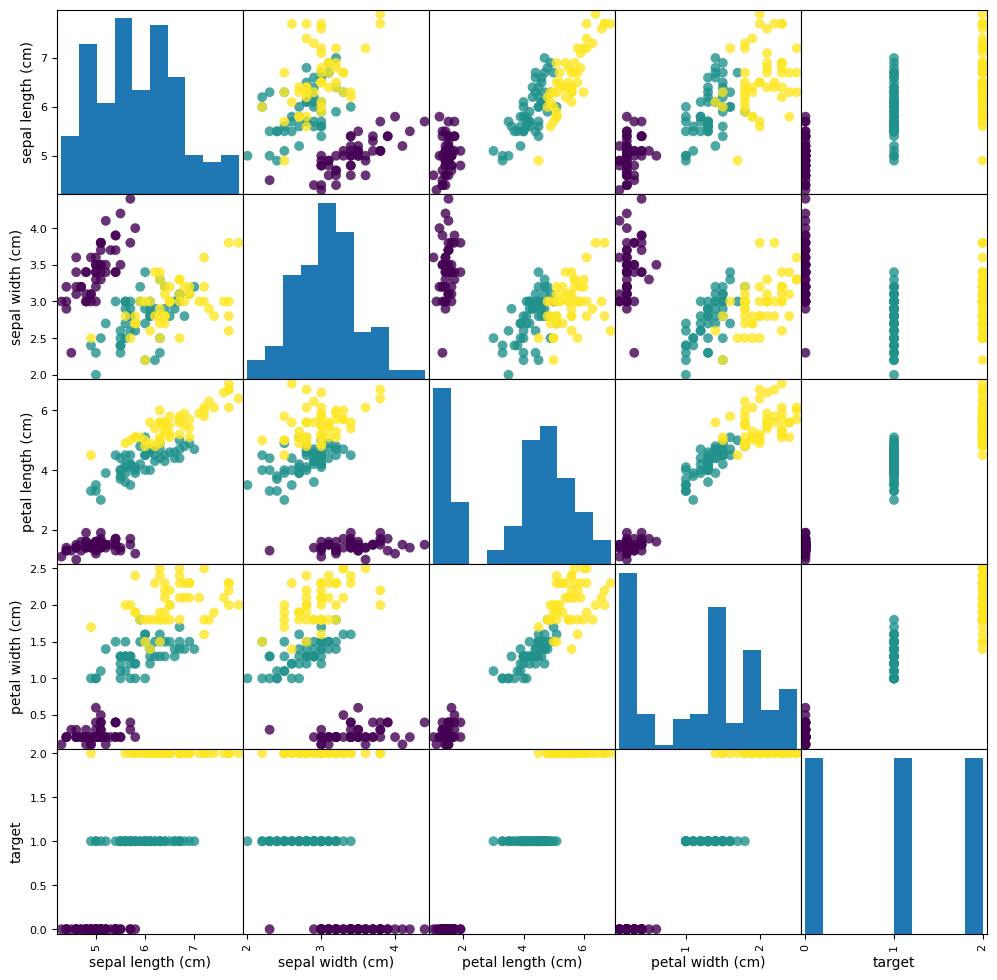

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


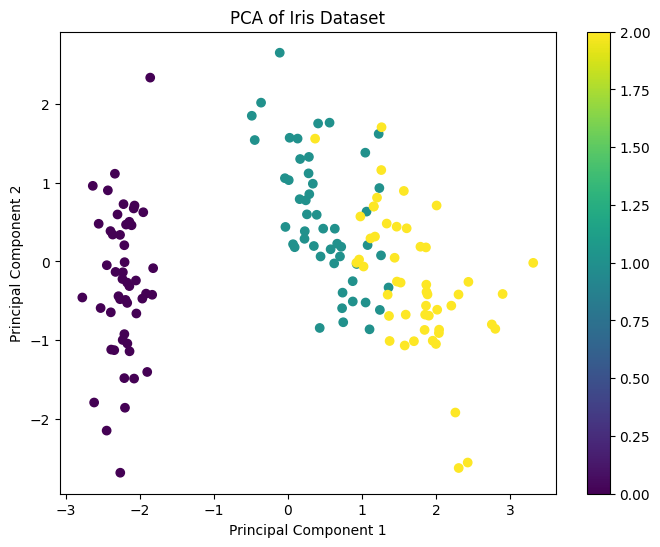

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
pd.plotting.scatter_matrix(iris_df, c=iris_df['target'], figsize=(12, 12), marker='o',hist_kwds={'bins': 10}, s=50, alpha=.8)
plt.show()
X = iris_df.drop('target', axis=1)
x = StandardScaler().fit_transform(X)
covariance_matrix = np.cov(x.T)
print("Covariance Matrix:\n", covariance_matrix)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
principal_components = eigenvectors[:, :2]
transformed_data = np.dot(x, principal_components)
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=iris_df['target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()


<PIL.Image.Image image mode=L size=640x480 at 0x79956B122230>


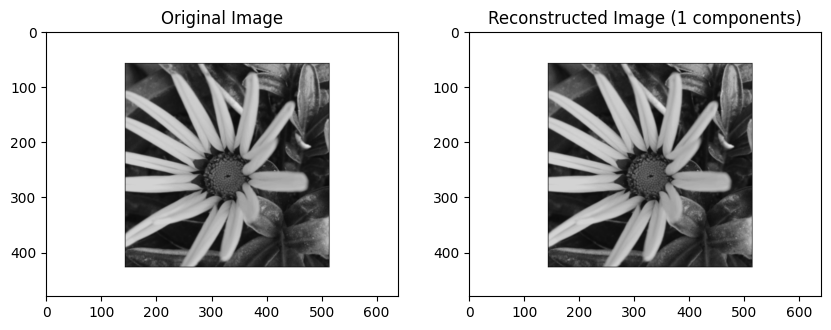

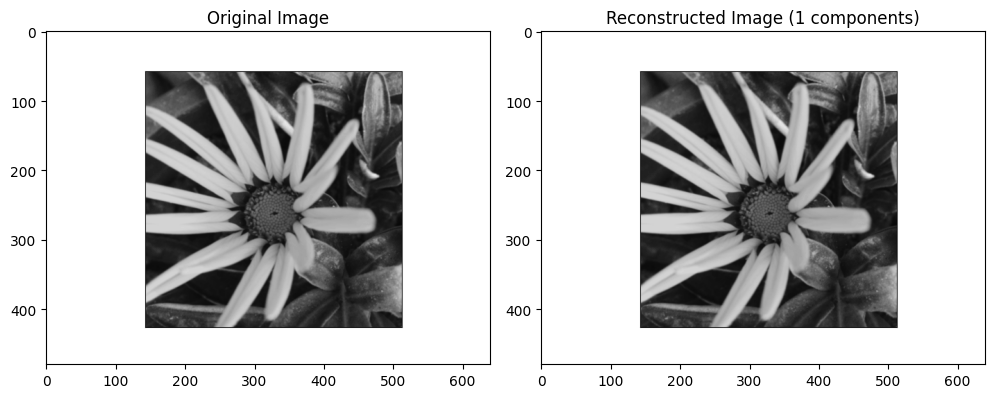

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
image = Image.open('Grey image.png').convert('L')
image_array = np.array(image)
print(image)
rows, cols = image_array.shape
image_data = image_array.reshape(rows * cols, 1)
n_components = min(image_data.shape[0], image_data.shape[1])
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(image_data)
reconstructed_data = pca.inverse_transform(reduced_data)
reconstructed_image = reconstructed_data.reshape(rows, cols)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image ({} components)'.format(n_components))
plt.show()
image = Image.open('Grey image.png').convert('L')
image_array = np.array(image)
rows, cols = image_array.shape
image_data = image_array.reshape(rows * cols, 1)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
for i, n_components in enumerate([1]):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(image_data)
    reconstructed_data = pca.inverse_transform(reduced_data)
    reconstructed_image = reconstructed_data.reshape(rows, cols)
    plt.subplot(2, 3, i + 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image ({} components)'.format(n_components))
plt.tight_layout()
plt.show()

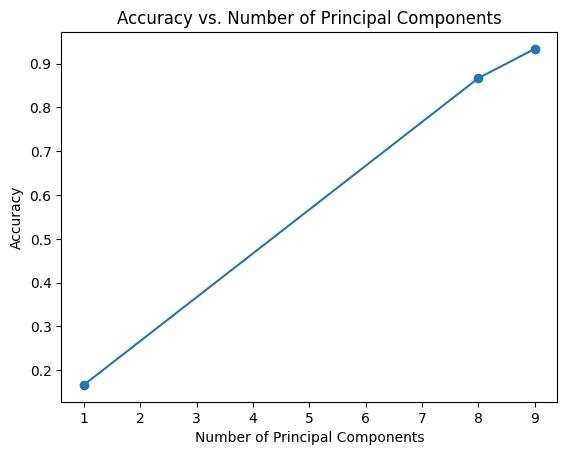

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv('Wine.csv')
X = data.drop('fixed acidity', axis=1)
y = data['fixed acidity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tolerance = 0.5
accurate_predictions = np.abs(y_test - y_pred) <= tolerance
accuracy = accurate_predictions.mean()
relevant_items = np.abs(y_test) <= tolerance
recall = accurate_predictions[relevant_items].mean()
X_filtered = X.loc[iris_df.index]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, iris_df['target'], test_size=0.2, random_state=52)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components_list = [1, 8, 9]
accuracies = []
for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.plot(n_components_list, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.show()